In [44]:
import librosa
import os
import IPython
import numpy as np

audio_dir = os.path.join('..','data','audio_label_clip')
file_dir = os.path.join(audio_dir,'u1722694_0.mp3')
y, sr = librosa.load(file_dir, sr=44100)

# 그냥 mfcc 사용

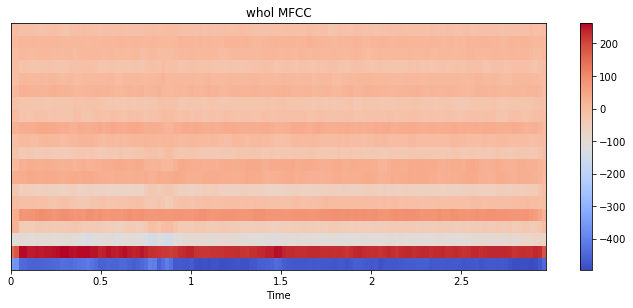

In [23]:
import matplotlib.pyplot as plt
import librosa.display

mfcc = librosa.feature.mfcc(y, sr, n_mfcc=20) 
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(mfcc, x_axis='time')
plt.title('whol MFCC')
plt.colorbar()

# HPSS후 MFCC
- concat 방향 수정!!!!!!!!!!!!!!!!!!!

In [7]:
#HPSS
y_harmonic, y_percussive = librosa.effects.hpss(y, margin=1.5)

In [45]:
# http://keunwoochoi.blogspot.com/2016/01/blog-post.html
# mfcc가 가장 활발하게 쓰이는 음성 인식에서는 대략 이 값을 수십개 (20~50)로 설정하고 씁니다. 즉 그정도면 충분하다고 알려져있습니다.
#mfcc
h_mfcc = librosa.feature.mfcc(y_harmonic, sr, n_mfcc=20) #13개 coefficient 사용
p_mfcc = librosa.feature.mfcc(y_percussive, sr, n_mfcc=20)

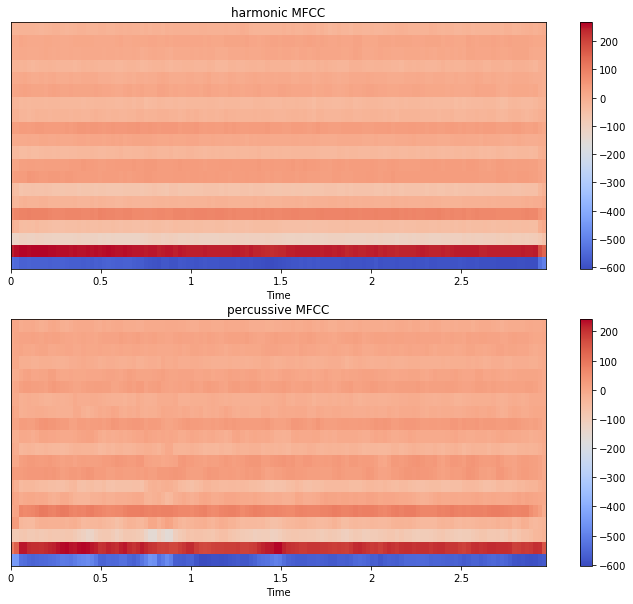

In [9]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(h_mfcc, x_axis='time')
plt.title('harmonic MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(p_mfcc, x_axis='time')
plt.title('percussive MFCC')
plt.colorbar()
plt.show()

## db단위로 수정

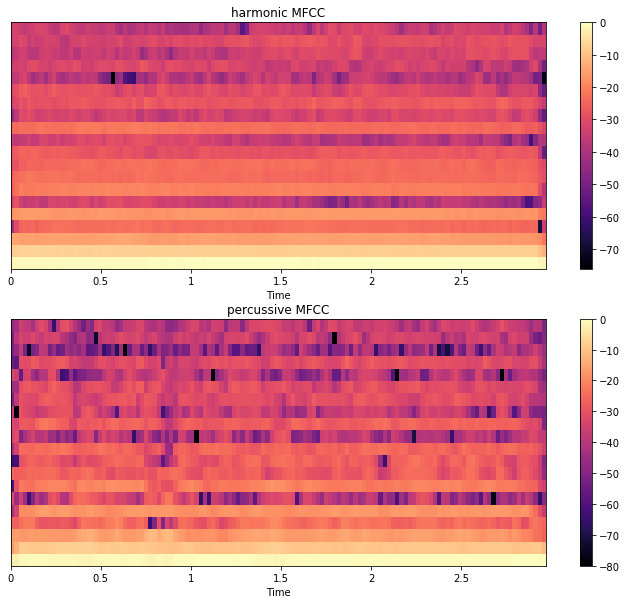

In [10]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(h_mfcc), ref=np.max), x_axis='time')
plt.title('harmonic MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(p_mfcc), ref=np.max), x_axis='time')
plt.title('percussive MFCC')
plt.colorbar()
plt.show()

## n_mfcc 20->13

In [51]:
y_harmonic, y_percussive = librosa.effects.hpss(y, margin=1.5)

h_mfcc = librosa.feature.mfcc(y_harmonic, sr, n_mfcc=13) #13개 coefficient 사용
p_mfcc = librosa.feature.mfcc(y_percussive, sr, n_mfcc=13)


row 축은 n_mfcc의 크기만큼 나온다

In [55]:
h_mfcc.shape

(13, 128)

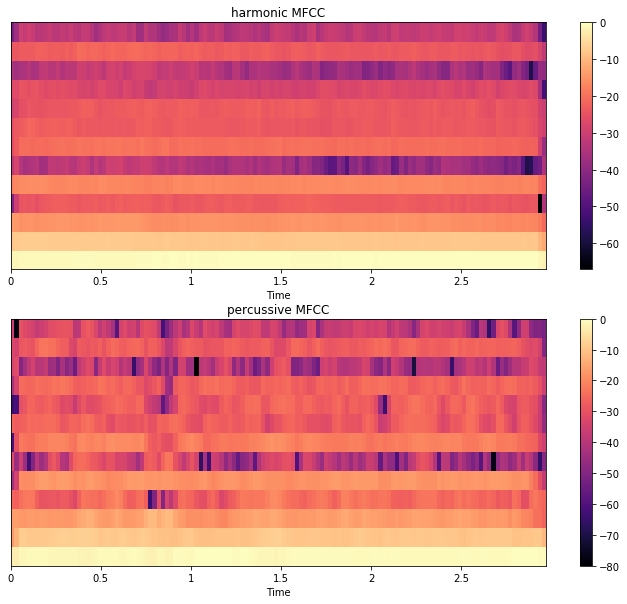

In [52]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(h_mfcc), ref=np.max), x_axis='time')
plt.title('harmonic MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(p_mfcc), ref=np.max), x_axis='time')
plt.title('percussive MFCC')
plt.colorbar()
plt.show()

In [76]:
import librosa
import numpy

#harmonic, percussive mfcc를 concat
#nfft: fft를 할 개수(sr/nfft=1 fft당 window size), hop_length: window stride
def get_mfcc_concat(y, sr=44100, hop=512):
    y = librosa.util.normalize(y) # normaliz
    y_harmonic, y_percussive = librosa.effects.hpss(y, margin=1.5)
    
    #13 coeffiecients
    h_mfcc = librosa.amplitude_to_db(librosa.feature.mfcc(y_harmonic, sr, hop_length=hop, n_mfcc=13), ref=np.max) 
    p_mfcc = librosa.amplitude_to_db(librosa.feature.mfcc(y_percussive, sr, hop_length=hop, n_mfcc=13), ref=np.max)
    
    out = np.concatenate((h_mfcc, p_mfcc), axis=1)

    return out

In [77]:
ret = get_mfcc_concat(y)

In [78]:
ret.shape

(13, 256)

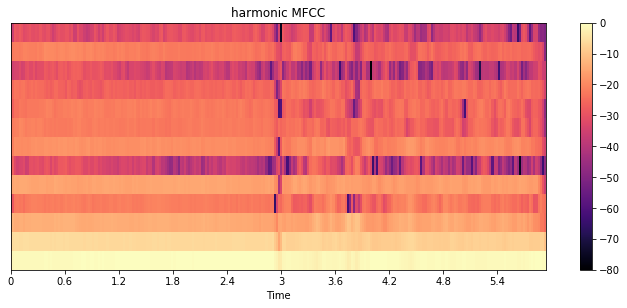

In [79]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(ret, x_axis='time')
plt.title('harmonic MFCC')
plt.colorbar()

In [ ]:
import librosa
import numpy

#harmonic, percussive mfcc를 concat
#nfft: fft를 할 개수(sr/nfft=1 fft당 window size), hop_length: window stride
def get_mfcc(y, sr=44100, hop=512):
    y = librosa.util.normalize(y) # normaliz
    y_harmonic, y_percussive = librosa.effects.hpss(y, margin=1.5)
    
    #13 coeffiecients
    h_mfcc = librosa.amplitude_to_db(librosa.feature.mfcc(y_harmonic, sr, hop_length=hop, n_mfcc=13), ref=np.max) 
    p_mfcc = librosa.amplitude_to_db(librosa.feature.mfcc(y_percussive, sr, hop_length=hop, n_mfcc=13), ref=np.max)
    
    out = np.concatenate((np.expand_dims(h_mfcc, axis=0), np.expand_dims(p_mfcc, axis=0)), axis=0)
    out = np.vstack()
    return out

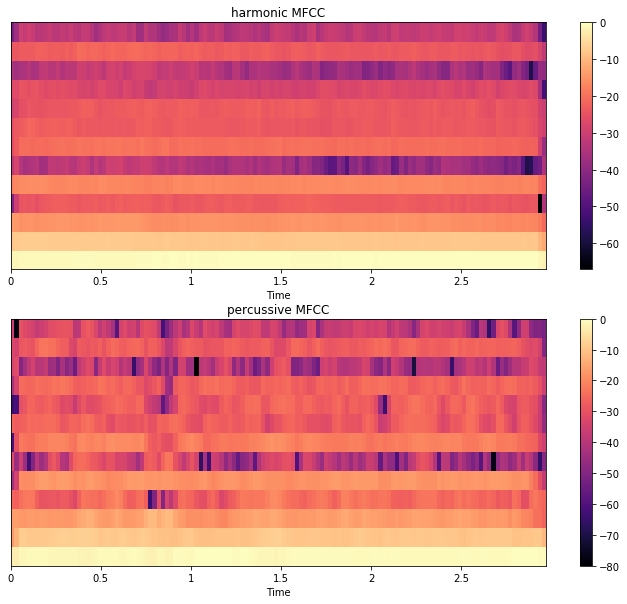

In [66]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(ret[0], x_axis='time')
plt.title('harmonic MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(ret[1], x_axis='time')
plt.title('percussive MFCC')
plt.colorbar()
plt.show()

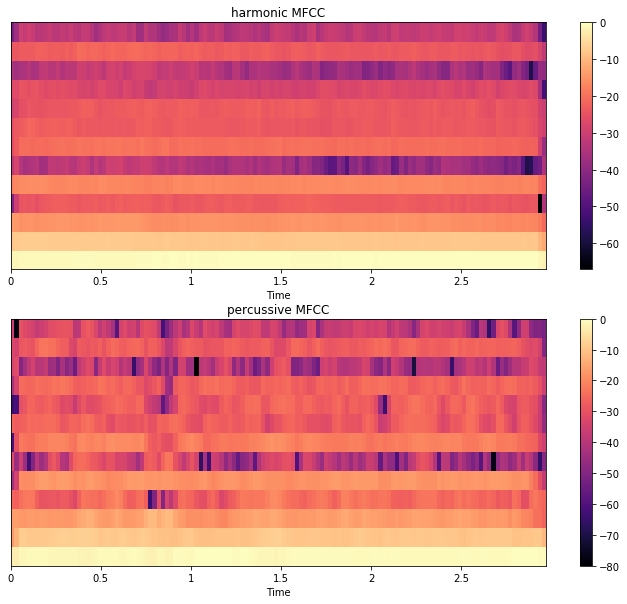

In [67]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(ret[0], x_axis='time')
plt.title('harmonic MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(ret[1], x_axis='time')
plt.title('percussive MFCC')
plt.colorbar()
plt.show()

In [69]:
ret.shape

(2, 13, 862)